In [74]:
import numpy as np 
#from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
dateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H")

In [75]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
df.head ()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [76]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ]) 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [78]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [79]:
df.shape

(92016, 5)

## Dealing with missing values 'nan' with a test statistic

In [80]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,5):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[]

In [81]:
# filling nan with mean in any columns

for j in range(0,5):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [82]:
# filling nan with mean in any columns

for j in range(0,5):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.


In [83]:
df.value_counts()

FullDate             Tmax  SysLoad     GasPrice  ElecPrice
2010-09-01 00:00:00  15.8  1688.21500  3.6900    23.710       1
2017-08-30 10:00:00  16.7  1402.80285  9.0100    141.185      1
2017-08-31 06:00:00  19.4  126.34805   8.5100    87.605       1
2017-08-31 05:00:00  19.4  71.46270    8.5100    83.060       1
2017-08-31 04:00:00  19.4  93.74095    8.5100    74.210       1
                                                             ..
2014-03-01 21:00:00  26.7  553.35760   3.9988    42.045       1
2014-03-01 20:00:00  26.7  582.76260   3.9988    42.950       1
2014-03-01 19:00:00  26.7  610.84415   3.9988    42.960       1
2014-03-01 18:00:00  26.7  602.46775   3.9988    43.245       1
2021-02-28 23:00:00  24.3  714.69630   5.4848    62.955       1
Length: 92016, dtype: int64

In [89]:
#converting to Dailing mean
df_daily = df.resample('D').sum()
print(df_daily)

             Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2010-09-01  379.2  41565.38000   88.5600   2751.700
2010-09-02  369.6  38898.99000   88.5600    570.810
2010-09-03  439.2  41665.76000  106.8000    504.975
2010-09-04  328.8  35638.08500   81.3600    502.275
2010-09-05  357.6  35611.41000  106.8000    500.555
...           ...          ...       ...        ...
2021-02-24  537.6  -1525.49745  134.4000    634.770
2021-02-25  518.4   4539.07855  130.5048    577.515
2021-02-26  547.2   9517.02430  130.1808   1445.495
2021-02-27  564.0   4932.88015  130.0800    488.980
2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 4 columns]


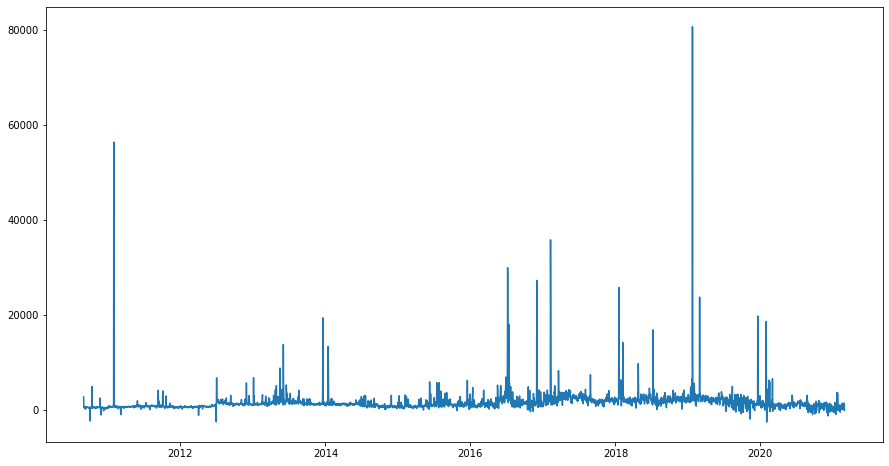

In [90]:
plt.plot(df_daily.index, df_daily['ElecPrice'])

In [91]:
df.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
ElecPrice,0.002126,0.138690,0.157768,1.000000


In [92]:
# resetting the index for df_daily and saving it as another dataframe (df_daily2)
df_daily2 = df_daily.reset_index()
df_daily2.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [93]:
#we only need the first two colums under df_daily2
df_daily2 = df_daily2[['FullDate','ElecPrice']]
df_daily2.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [94]:
# making a new dataframe from df_daily2 but renaming the columns
new_df = df_daily2.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
new_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [95]:
x = new_df.tail(2757)
y = new_df.head(2757)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65,test_size=0.35, random_state=101)

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65,test_size=0.35, random_state=101)

In [97]:
from fbprophet import Prophet
model = Prophet()
model.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [106]:
# using prophet to predict for the next 12 days
future = model.make_future_dataframe(periods=2757, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-08-14,1692.431005,-1715.803662,4596.150965,1692.431005,1692.431005,-284.266041,-284.266041,-284.266041,207.154082,207.154082,207.154082,-491.420124,-491.420124,-491.420124,0.0,0.0,0.0,1408.164964
1,2013-08-15,1690.967523,-1580.570702,4648.301045,1690.967523,1690.967523,36.919705,36.919705,36.919705,508.057310,508.057310,508.057310,-471.137605,-471.137605,-471.137605,0.0,0.0,0.0,1727.887228
2,2013-08-16,1689.504041,-1873.728058,4448.042897,1689.504041,1689.504041,-387.293602,-387.293602,-387.293602,58.809370,58.809370,58.809370,-446.102972,-446.102972,-446.102972,0.0,0.0,0.0,1302.210440
3,2013-08-18,1686.577077,-2044.126310,4076.007565,1686.577077,1686.577077,-809.610362,-809.610362,-809.610362,-424.061907,-424.061907,-424.061907,-385.548455,-385.548455,-385.548455,0.0,0.0,0.0,876.966715
4,2013-08-21,1682.186631,-1357.942602,4999.572518,1682.186631,1682.186631,-76.236230,-76.236230,-76.236230,207.154082,207.154082,207.154082,-283.390312,-283.390312,-283.390312,0.0,0.0,0.0,1605.950401
5,2013-08-23,1679.259667,-1627.910191,4598.797446,1679.259667,1679.259667,-160.177849,-160.177849,-160.177849,58.809370,58.809370,58.809370,-218.987219,-218.987219,-218.987219,0.0,0.0,0.0,1519.081819
6,2013-08-24,1677.796185,-2096.074898,4245.735609,1677.796185,1677.796185,-544.856213,-544.856213,-544.856213,-354.387762,-354.387762,-354.387762,-190.468451,-190.468451,-190.468451,0.0,0.0,0.0,1132.939972
7,2013-08-25,1676.332703,-2002.137919,4224.999399,1676.332703,1676.332703,-589.404542,-589.404542,-589.404542,-424.061907,-424.061907,-424.061907,-165.342635,-165.342635,-165.342635,0.0,0.0,0.0,1086.928161
8,2013-08-26,1674.869221,-1639.720838,4685.231748,1674.869221,1674.869221,-112.175078,-112.175078,-112.175078,31.998022,31.998022,31.998022,-144.173099,-144.173099,-144.173099,0.0,0.0,0.0,1562.694143
9,2013-08-27,1673.405739,-1580.983065,4652.260462,1673.405739,1673.405739,-154.967810,-154.967810,-154.967810,-27.569115,-27.569115,-27.569115,-127.398695,-127.398695,-127.398695,0.0,0.0,0.0,1518.437929


In [107]:
# comparing yhat(predictions) and the trends

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2013-08-14,1408.164964,-1715.803662,4596.150965,1692.431005,1692.431005,1692.431005
1,2013-08-15,1727.887228,-1580.570702,4648.301045,1690.967523,1690.967523,1690.967523
2,2013-08-16,1302.210440,-1873.728058,4448.042897,1689.504041,1689.504041,1689.504041
3,2013-08-18,876.966715,-2044.126310,4076.007565,1686.577077,1686.577077,1686.577077
4,2013-08-21,1605.950401,-1357.942602,4999.572518,1682.186631,1682.186631,1682.186631
...,...,...,...,...,...,...,...
4544,2028-09-12,-9120.677832,-14962.078934,-3723.950135,-8729.018671,-13775.796659,-4230.599766
4545,2028-09-13,-8910.182187,-14522.250295,-3196.701946,-8732.275485,-13779.672748,-4231.033393
4546,2028-09-14,-8631.094764,-14608.185083,-2921.977475,-8735.532299,-13783.548837,-4231.467019
4547,2028-09-15,-9099.481587,-14804.835950,-3685.770820,-8738.789113,-13787.424926,-4231.900646


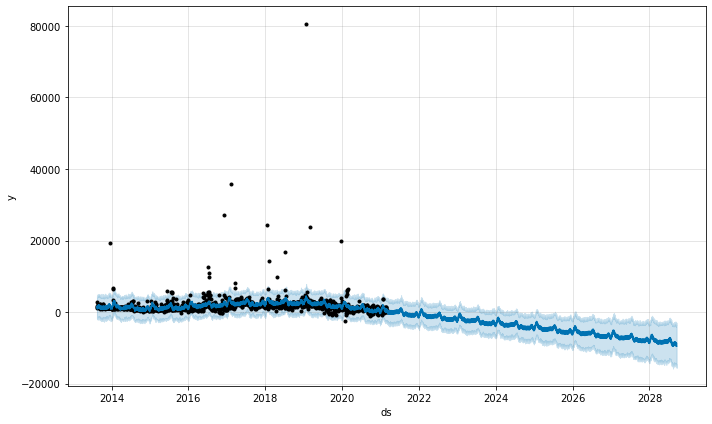

In [108]:
# plotting using the forecast dataframe

model.plot(forecast)
plt.show() 

In [109]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [110]:
# MAPE
mean_absolute_percentage_error(forecast['trend'], forecast['yhat'])

43.95204265090938

In [111]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(forecast['trend'], forecast['yhat']))
print(rmse)

513.9878377490238


Text(0, 0.5, 'ElecPrice')

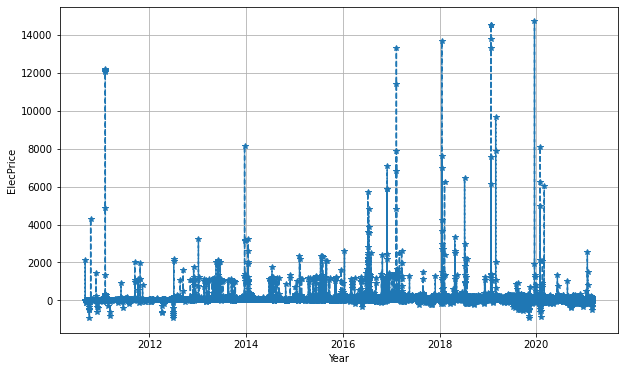

In [84]:
df.set_index( "FullDate" , inplace= True ) 
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'ElecPrice' ) 

In [86]:
#converting to Dailing mean
df_daily = df.resample('D').mean()

In [87]:
import statsmodels.api as sm
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


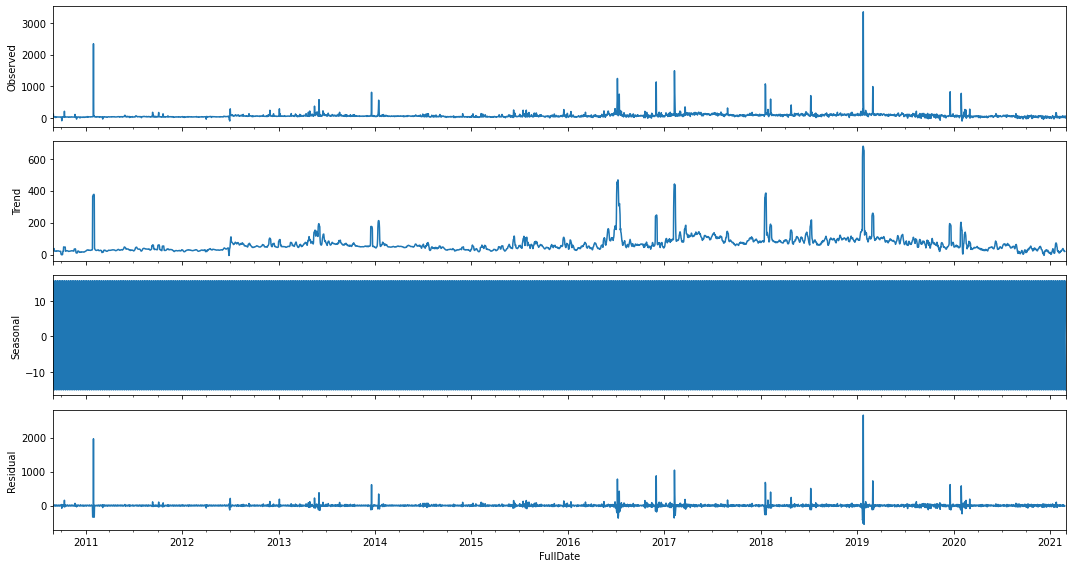

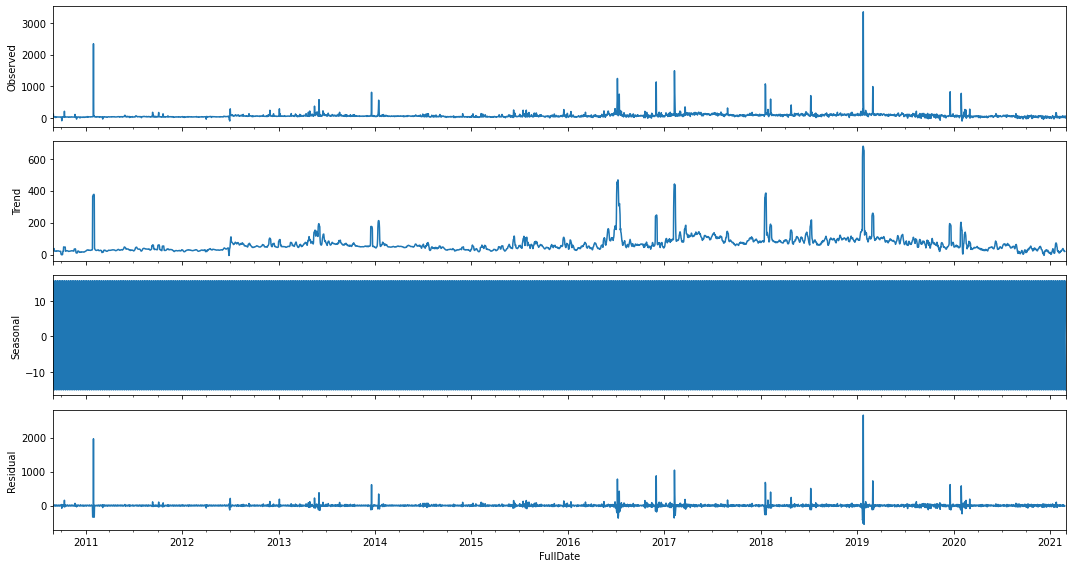

In [88]:
rcParams['figure.figsize'] = 15,8
decompose_series = sm.tsa.seasonal_decompose(df_daily['ElecPrice'], model = 'additive')
decompose_series.plot()

In [ ]:
Train = train.ix['']
Test = test.ix['']